# Adversarial Search: Playing Connect 4


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem:

* Initial state: empty board
* Actions: 1 move per an unfilled column per player
* Transition model: when a player plays thier turn, the transition model returns the new board with the player's played action 
* Goal state: 4 pieces in a row (these pieces can be horizontal, vertial, or diagnol)

How big is the search space?
- Since order does matter in this game, a permutation is used to calculate the search space. In connect4, the board has 3 states per spot: x mark, o mark, and empty mark. In a 6x7 board, the total number of spots is 42. Hence, the search space is 3^42 = 109418989131512359209. The search space changes depending on the size of the board. If the size of the board is smaller, then the search space decreases and similarly, if the size of the board is bigger, then the search space increases.

## Task 2: Game Environment and Random Agent [2 point]

Use a numpy character array as the board.

In [1]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=" ")

print(empty_board())

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']]


Instead of colors for the players use 'x' and 'o' to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 'x')`, where board is the current board position and player is the player whose next move it is and who the agent should play.

Implement the board and helper functions for:

* The transition model (result).
* The utility function.
* Check for terminal states.
* A check for available actions. 
* A function to visualize the board.

Make sure that all these functions work with boards of different sizes.

Implement an agent that plays randomly and let two random agents play against each other 1000 times. How often does each player win? Is the result expected? 

In [2]:
import numpy as np

#clearing the board
def clear_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=" ")

# check for available actions aka unfilled columns
def available_actions(board):
    
    #list to keep track of unfilled columns
    availspots = []
    index = 0
    
    #iterating through the columns
    for column in range(0,board.shape[1]): 
        row = board[:,column]
        if ' ' in row:
            availspots.append(index)
        index += 1
    
    #returning list w avail columns
    return availspots

#transition model: player making a move & filling the board with a move
def action(player, action, board):
    
    #making copy of original board
    updatedboard = board
    
    #player making a move- either an x or an o 
    for column in reversed(updatedboard):
        if column[action] == ' ':
            column[action] = player
            return updatedboard
    return board 


#utility function: finding if there's a winner
def utility(player, board):
    
    #getting player
    myplayer = ''
    myplayer = player+player+player+player
    
    #gets size of the board
    boardsize = len(board)
        
    #checking diagnol win
    diagnol1 = [board[i][i] for i in range(boardsize)]
    diagnol2 = [board[i][boardsize-1-i] for i in range(boardsize)]
    winner1 = ""
    winner2 = ""
    w1 = winner1.join(diagnol1)
    w2 = winner2.join(diagnol2)
    if myplayer in w1:
        return(player)
    if myplayer in w2:
        return(player)
    
    #checking horizontal win
    for column in range(len(board)):
        row = board[column,:]
        winner = ""
        w = winner.join(row)
        if myplayer in w:
            return(player)
            break
            
    #checking vertical win
    for column in range(len(board)): 
        row = board[:,column]
        winner = ""
        w = winner.join(row)
        if myplayer in w:
            return(player)
            break
        
#check for terminal states
def terminal(player, board):
    getplayer = utility(player, board
    if (getplayer == 'x'):
        return("winner: player x")
    if (getplayer == 'o'):
        return("winner: player o")
    else:
        return ' '

#visualize the board
def visualize(board):
    print(board)

In [40]:
#testing helper functions

board = clear_board((6,7))
print("columns:", board.shape[1])
board = action('x',0, board)
board = action('o',1, board)
board = action('x',1, board)
board = action('o',2, board)
board = action('o',2, board)
board = action('x',2, board)
board[:,3] = 'o'
board[2][3] = 'x'
visualize(board)
print("available actions:", available_actions(board))
print(terminal('x', board))
print(terminal('o', board))
print("\n")

board1 = clear_board((4,4))
print("columns:", board1.shape[1])
board1[1] = 'o'
visualize(board1)
print("available actions:", available_actions(board1))
print(terminal('x', board1))
print(terminal('o', board1))
print("\n")

board2 = clear_board((5,5))
print("columns:", board2.shape[1])
board2[:,3] = 'x'
visualize(board2)
print("available actions:", available_actions(board2))
print(terminal('x', board2))
print(terminal('o', board2))

columns: 7
[[' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' 'x' 'o' ' ' ' ' ' ']
 [' ' 'x' 'o' 'o' ' ' ' ' ' ']
 ['x' 'o' 'o' 'o' ' ' ' ' ' ']]
available actions: [0, 1, 2, 4, 5, 6]
winner: player x
 


columns: 4
[[' ' ' ' ' ' ' ']
 ['o' 'o' 'o' 'o']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
available actions: [0, 1, 2, 3]
 
winner: player o


columns: 5
[[' ' ' ' ' ' 'x' ' ']
 [' ' ' ' ' ' 'x' ' ']
 [' ' ' ' ' ' 'x' ' ']
 [' ' ' ' ' ' 'x' ' ']
 [' ' ' ' ' ' 'x' ' ']]
available actions: [0, 1, 2, 4]
winner: player x
 


Implement an agent that plays randomly and let two random agents play against each other 1000 times. How often does each player win? Is the result expected? 

In [8]:
import random as rand

def random_agent(player, board):
    
    #returns 1 random move from possible actions
    play = rand.choice(available_actions(board))
    
    #returns the player, the 1 random play & the board 
    return (player, play, board)

In [15]:
def playing_randomly(randruns):

    #initializing the amount of wins for each player
    player1wins = 0
    player2wins = 0
    ties = 0
    
    #iterating 1000 times
    for run in range(0, randruns):
        
        #initlalizing an empty board with size 6x7
        board = clear_board((6,7))
        
        #initializing if there is a winner variable
        isThereWinner = False

        #while no one has won the game, do the following:
        while(isThereWinner == False):
            
            #initializing my players
            player1 = random_agent('x', board)
            player2 = random_agent('o', board)

            #player1 makes first move
            board = action(player1[0],player1[1], board)

            #checking if player1 has won
            if ( utility(player1[0],board) == 'x'):
                player1wins += 1
                isThereWinner = True
                break
            
            #player2 makes next move while no one has won the game
            if(isThereWinner == False):
                board = action(player2[0],player2[1], board)

            #checking if player2 has won
            if ( utility(player2[0],board)== 'o' ):
                player2wins += 1
                isThereWinner = True
                break
            
            #checking if there is a tie
            if ( (utility(player1[0],board)== ' ') or (utility(player2[0],board)== ' ') or (len(available_actions(board))==0) ):
                ties += 1
                isThereWinner = True
                break

    print("player1 wins:", player1wins)
    print("player2 wins:", player2wins)
    print("ties:", ties)
        
playing_randomly(1000)

player1 wins: 560
player2 wins: 407
ties: 33


## Task 3: Minimax Search with Alpha-Beta Pruning [4 points]

### Implement the search starting from a given board and specifying the player.

__Note:__ The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [234]:
#code taken & modified from tictactoe_alpha_beta_tree_search.ipynb
import math

# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, player = 'x'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return value, move


def max_value_ab(state, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
    
    if DEBUG >= 2: print("max: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in available_actions(state):        
        v2, a2 = min_value_ab(action(player, a, state), player, alpha, beta)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab(state, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
        
    if DEBUG >= 2: print("min: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in available_actions(state):
        v2, a2 = max_value_ab(action('o', a, state), player, alpha, beta)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

#### Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [152]:
#------- BOARD ONE ---------

#empty board
board = clear_board((6,7))

#populating board manually
board = action('x',0, board)
board = action('o',3, board)
board = action('x',0, board)
board = action('o',1, board)
board = action('x',0, board)
board = action('o',1, board)

#visualizing board
visualize(board)

#alpha beta search test
%timeit -n1 -r1 display(alpha_beta_search(board))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' 'o' ' ' ' ' ' ' ' ' ' ']
 ['x' 'o' ' ' 'o' ' ' ' ' ' ']]
Number of nodes searched: 8


(1, 0)

10.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [153]:
#------- BOARD TWO ---------

#empty board
board2 = clear_board((6,7))

#populating board manually
board2 = action('x',1, board2)
board2 = action('o',5, board2)
board2 = action('x',3, board2)
board2 = action('o',3, board2)
board2 = action('x',6, board2)
board2 = action('o',2, board2)
board2 = action('x',6, board2)
board2 = action('o',2, board2)
board2 = action('x',3, board2)
board2 = action('o',5, board2)
board2 = action('x',3, board2)
board2 = action('o',6, board2)
board2 = action('x',2, board2)
board2 = action('o',1, board2)
board2 = action('x',0, board2)
board2 = action('o',0, board2)

#visualizing board
visualize(board2)

#alpha beta search test
%timeit -n1 -r1 display(alpha_beta_search(board2))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' 'x' 'x' ' ' ' ' 'o']
 ['o' 'o' 'o' 'o' ' ' 'o' 'x']
 ['x' 'x' 'o' 'x' ' ' 'o' 'x']]
Number of nodes searched: 35


(1, 0)

15.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [154]:
#------- BOARD THREE ---------

#empty board
board3 = clear_board((6,7))

#populating board manually
board3 = action('x',0, board3)
board3 = action('o',1, board3)
board3 = action('x',1, board3)
board3 = action('o',2, board3)
board3 = action('o',2, board3)
board3 = action('x',2, board3)
board3[:,3] = 'o'
board3[2][3] = 'x'

#visualizing board
visualize(board3)

#alpha beta search test
%timeit -n1 -r1 display(alpha_beta_search(board3))

[[' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' 'x' 'o' ' ' ' ' ' ']
 [' ' 'x' 'o' 'o' ' ' ' ' ' ']
 ['x' 'o' 'o' 'o' ' ' ' ' ' ']]
Number of nodes searched: 1


(1, None)

7.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [155]:
#------- BOARD FOUR ---------

#empty board
board4 = clear_board((6,7))

#populating board manually
board4 = action('x',3, board4)
board4 = action('o',6, board4)
board4 = action('x',3, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',3, board4)
board4 = action('x',5, board4)
board4 = action('o',2, board4)
board4 = action('x',3, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',2, board4)
board4 = action('x',4, board4)
board4 = action('o',1, board4)
board4 = action('x',4, board4)
board4 = action('o',6, board4)
board4 = action('x',2, board4)
board4 = action('o',6, board4)
board4 = action('x',4, board4)
board4 = action('o',3, board4)
board4 = action('x',6, board4)
board4 = action('o',1, board4)
board4 = action('x',5, board4)
board4 = action('o',1, board4)


#visualizing board
visualize(board4)

#alpha beta search test
%timeit -n1 -r1 display(alpha_beta_search(board4))

[[' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' ' ' 'o' ' ' 'x' 'x']
 [' ' 'o' 'x' 'x' 'x' 'o' 'o']
 [' ' 'o' 'o' 'x' 'x' 'x' 'o']
 [' ' 'o' 'o' 'x' 'x' 'o' 'o']]
Number of nodes searched: 67


(1, 0)

17.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [156]:
#------- BOARD FIVE ---------

#empty board
board5 = clear_board((6,7))

#populating board manually
board5 = action('x',1, board5)
board5 = action('o',4, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',5, board5)
board5 = action('o',6, board5)
board5 = action('x',0, board5)
board5 = action('o',2, board5)
board5 = action('x',5, board5)
board5 = action('o',5, board5)
board5 = action('x',4, board5)
board5 = action('o',2, board5)
board5 = action('x',0, board5)
board5 = action('o',2, board5)
board5 = action('x',4, board5)
board5 = action('o',6, board5)
board5 = action('x',5, board5)
board5 = action('o',1, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',6, board5)
board5 = action('o',2, board5)
board5 = action('x',0, board5)
board5 = action('o',0, board5)

#visualizing board
visualize(board5)

#alpha beta search test
%timeit -n1 -r1 display(alpha_beta_search(board5))

[['o' ' ' 'o' ' ' ' ' ' ' ' ']
 ['x' ' ' 'x' ' ' ' ' ' ' ' ']
 ['o' ' ' 'o' ' ' ' ' 'x' ' ']
 ['x' ' ' 'o' ' ' 'x' 'o' 'x']
 ['x' 'o' 'o' ' ' 'x' 'x' 'o']
 ['o' 'x' 'x' ' ' 'o' 'x' 'o']]
Number of nodes searched: 41


(1, 1)

7.57 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [550]:
%%time
#------- BOARD 4x4 (TEST 1) ---------

#empty board
board = clear_board((4,4))

#populating the board
board = action('x',0, board)
board = action('o',3, board)
board = action('x',0, board)
board = action('o',1, board)
board = action('x',0, board)
board = action('o',1, board)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board)

#visualizing board
visualize(board)

[['x' ' ' ' ' ' ']
 ['x' 'x' ' ' ' ']
 ['x' 'o' ' ' 'x']
 ['x' 'o' 'x' 'o']]
CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1.13 ms


In [272]:
%%time
#------- BOARD 5x5 (TEST 2) ---------

#empty board
board2 = clear_board((5,5))

#populating board manually
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board2,player = 'o')

#visualizing board
visualize(board2)

[[' ' ' ' ' ' ' ' ' ']
 ['o' 'o' ' ' ' ' ' ']
 ['o' 'x' ' ' ' ' ' ']
 ['o' 'x' ' ' ' ' ' ']
 ['o' 'x' 'o' 'o' 'o']]
CPU times: user 910 µs, sys: 3.35 ms, total: 4.26 ms
Wall time: 5.33 ms


In [275]:
%%time
#------- BOARD 5x5 (TEST 3) ---------

#empty board
board3 = clear_board((5,5))

#populating board manually
board3 = action('x',1, board3)
board3 = action('o',0, board3)
board3 = action('x',3, board3)
board3 = action('o',2, board3)
board3 = action('x',4, board3)
board3 = action('o',2, board3)
board3 = action('x',0, board3)
board3 = action('o',1, board3)
board3 = action('x',2, board3)
board3 = action('o',0, board3)
board3 = action('x',4, board3)
board3 = action('o',2, board3)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board3, player = 'o')

#visualizing board
visualize(board3)

[['o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'x' 'o' 'o']
 ['x' 'o' 'o' 'o' 'x']
 ['o' 'x' 'o' 'x' 'x']]
CPU times: user 6.32 ms, sys: 2.11 ms, total: 8.43 ms
Wall time: 9.07 ms


In [301]:
%%time
#------- BOARD 6x6 (TEST 4) ---------

#empty board
board4 = clear_board((6,6))

#populating board manually
board4 = action('x',1, board4)
board4 = action('o',0, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)
board4 = action('x',5, board4)
board4 = action('o',2, board4)
board4 = action('x',3, board4)
board4 = action('o',1, board4)
board4 = action('x',2, board4)
board4 = action('o',0, board4)
board4 = action('x',4, board4)
board4 = action('o',2, board4)
board4 = action('x',1, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board4, player = 'o')

#visualizing board
visualize(board4)

[[' ' ' ' ' ' ' ' ' ' ' ']
 [' ' 'o' 'o' 'o' 'o' ' ']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'x' 'o' 'x' 'o' 'o']
 ['o' 'o' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 5.12 ms, sys: 3.33 ms, total: 8.44 ms
Wall time: 11.5 ms


In [516]:
%%time
#------- BOARD 6x6 (TEST 5) ---------

#empty board
board5 = clear_board((6,6))

#populating board manually
board5 = action('x',1, board5)
board5 = action('o',0, board5)
board5 = action('x',3, board5)
board5 = action('o',4, board5)
board5 = action('x',5, board5)
board5 = action('o',2, board5)
board5 = action('x',3, board5)
board5 = action('o',3, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',4, board5)
board5 = action('o',2, board5)
board5 = action('x',1, board5)
board5 = action('o',5, board5)
board5 = action('x',3, board5)
board5 = action('o',4, board5)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board5, player = 'o')

#visualizing board
visualize(board5)

[[' ' ' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' 'o' 'o' ' ']
 ['o' 'o' 'o' 'x' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'x' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 6.93 ms, sys: 2.69 ms, total: 9.62 ms
Wall time: 10.7 ms


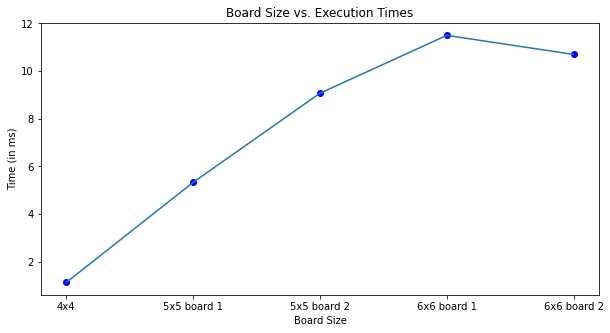

In [674]:
#PLOT DISPLAYING BOARD SIZE & EXECUTION TIMES

import matplotlib.pyplot as plot

#setting up graph dimensions
mygraph = plot.figure(figsize = (10, 5))
plotvalues = [('4x4', 1.13), ('5x5 board 1', 5.33), ('5x5 board 2', 9.07), ('6x6 board 1', 11.5), ('6x6 board 2', 10.7)]
x = [value[0] for value in plotvalues]
y = [value[1] for value in plotvalues]
plot.plot(x, y)
plot.scatter('4x4', 1.13, facecolor='blue')
plot.scatter('5x5 board 1', 5.33, facecolor='blue')
plot.scatter('5x5 board 2', 9.07, facecolor='blue')
plot.scatter('6x6 board 1', 11.5, facecolor='blue')
plot.scatter('6x6 board 2', 10.7, facecolor='blue')
plot.title('Board Size vs. Execution Times')
plot.ylabel('Time (in ms)')
plot.xlabel('Board Size')
plot.show()

Discussion:
* In order to see the execution timing difference between different size graphs, I plotted a line graph to compare the data.  
* Based on the results above, as seen on the graph, there is a noticible pattern: as the board increases in size, the execution time increases as well. This is expected because the nodes explored increases with a bigger state space. Since there are more calls for the program to make, hence it takes more time for the program to execute.

### Move ordering

Describe and implement a simple move ordering strategy. How does this strategy influence the time it takes to 
make a move?

In [596]:
#code taken & modified from tictactoe_alpha_beta_tree_search.ipynb
import math

# moving ordering strategy: check known good moves first to get a good bound early
# personally- for connect4, i believe playing in the middle column is a good strategy, 
#  so my strategy is to check the middle column & work my way 'outside'
def middle_ordering(board):
    
    #getting num of columns in board
    boardsize = board.shape[1]
    
    #getting original columns in board
    originalcolumns = []
    for i in range(0,boardsize):
        originalcolumns.append(i)
    
    #breaking it down for board size
    if(boardsize == 4):
        priority = [0,1,1,0]
    
    elif(boardsize == 5):
        priority = [0,1,2,1,0]
        
    elif(boardsize == 6):
        priority = [0,1,2,2,1,0]
    
    elif(boardsize == 7):
        priority = [0,1,2,3,2,1,0]
    
    #initializing a list that has the best columns
    bestcolumns = []
    
    #finding priority column & inserting in variable
    priority = [priority[i] for i in originalcolumns]
    bestcolumns =[a for _,a in sorted(zip(priority,originalcolumns), reverse=True)]
    
    #returning list of columns based on priority
    return bestcolumns

#no ordering
def no_ordering(board):
    
    #getting num of columns in board
    boardsize = board.shape[1]
    
    #getting original columns in board
    originalcolumns = []
    for i in range(0,boardsize):
        originalcolumns.append(i)
    
    #returning list of original columns (not based on priority)
    return originalcolumns

# global variables
DEBUG = 0 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, player = 'x', order = no_ordering):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, player, -math.inf, +math.inf, order)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return value, move


def max_value_ab(state, player, alpha, beta, order):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
    
    if DEBUG >= 2: print("max: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in order(state):        
        v2, a2 = min_value_ab(action(player, a, state), player, alpha, beta, order)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab(state, player, alpha, beta, order):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
        
    if DEBUG >= 2: print("min: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in order(state):
        v2, a2 = max_value_ab(action('o', a, state), player, alpha, beta, order)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

In [630]:
%%time
#------- ORDERING BOARD 4x4 (TEST 1) ---------

#empty board
board = clear_board((4,4))

#populating the board
board = action('x',0, board)
board = action('o',3, board)
board = action('x',0, board)
board = action('o',1, board)
board = action('x',0, board)
board = action('o',1, board)

#timing testing with alpha beta search
move = alpha_beta_search(board,player='o', order = middle_ordering)

#visualizing board
visualize(board)

[['o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o']]
CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1.12 ms


In [643]:
%%time
#------- ORDERING BOARD 5x5 (TEST 2) ---------

#empty board
board2 = clear_board((5,5))

#populating board manually
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)

#timing testing with alpha beta search
move = alpha_beta_search(board2,player = 'o', order = middle_ordering)

#visualizing board
visualize(board2)

[['o' 'o' ' ' ' ' ' ']
 ['o' 'o' 'o' 'o' 'o']
 ['o' 'x' 'o' 'o' 'o']
 ['o' 'x' 'o' 'o' 'o']
 ['o' 'x' 'o' 'o' 'o']]
CPU times: user 1.96 ms, sys: 0 ns, total: 1.96 ms
Wall time: 2.03 ms


In [652]:
%%time
#------- ORDERING BOARD 5x5 (TEST 3) ---------

#empty board
board3 = clear_board((5,5))

#populating board manually
board3 = action('x',1, board3)
board3 = action('o',0, board3)
board3 = action('x',3, board3)
board3 = action('o',2, board3)
board3 = action('x',4, board3)
board3 = action('o',2, board3)
board3 = action('x',0, board3)

#timing testing with alpha beta search
move = alpha_beta_search(board3, player = 'o', order = middle_ordering)

#visualizing board
visualize(board3)

[[' ' ' ' ' ' ' ' ' ']
 ['o' ' ' 'o' ' ' ' ']
 ['o' 'o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o' 'o']
 ['o' 'x' 'o' 'x' 'x']]
CPU times: user 6.13 ms, sys: 1.29 ms, total: 7.42 ms
Wall time: 4.92 ms


In [661]:
%%time
#------- ORDERING BOARD 6x6 (TEST 4) ---------

#empty board
board4 = clear_board((6,6))

#populating board manually
board4 = action('x',1, board4)
board4 = action('o',0, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)
board4 = action('x',5, board4)
board4 = action('o',2, board4)
board4 = action('x',3, board4)
board4 = action('o',1, board4)
board4 = action('x',2, board4)
board4 = action('o',0, board4)
board4 = action('x',4, board4)
board4 = action('o',2, board4)
board4 = action('x',1, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board4, player = 'o', order = middle_ordering)

#visualizing board
visualize(board4)

[[' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ']
 [' ' 'o' 'o' 'o' 'o' ' ']
 ['o' 'x' 'o' 'x' 'o' 'o']
 ['o' 'o' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 3.51 ms, sys: 3.35 ms, total: 6.86 ms
Wall time: 7.23 ms


In [669]:
%%time
#------- ORDERING BOARD 6x6 (TEST 5) ---------

#empty board
board5 = clear_board((6,6))

#populating board manually
board5 = action('x',1, board5)
board5 = action('o',0, board5)
board5 = action('x',3, board5)
board5 = action('o',4, board5)
board5 = action('x',5, board5)
board5 = action('o',2, board5)
board5 = action('x',3, board5)
board5 = action('o',3, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',4, board5)
board5 = action('o',2, board5)
board5 = action('x',1, board5)
board5 = action('o',5, board5)
board5 = action('x',4, board5)
board5 = action('o',4, board5)

#timing testing with alpha beta search
DEBUG = 0
move = alpha_beta_search(board5, player = 'o', order = middle_ordering)

#visualizing board
visualize(board5)

[[' ' ' ' 'o' 'o' 'o' ' ']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'x' 'o']
 ['o' 'x' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 6.61 ms, sys: 2.3 ms, total: 8.91 ms
Wall time: 7.51 ms


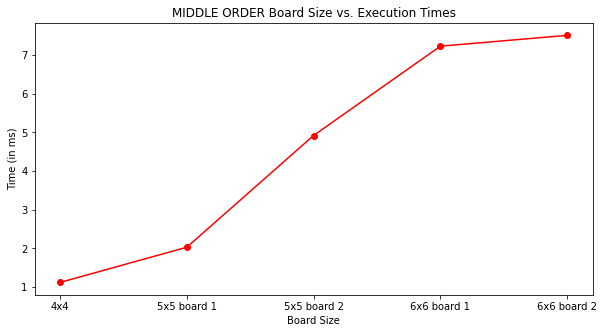

In [679]:
#PLOT DISPLAYING BOARD SIZE & EXECUTION TIMES

import matplotlib.pyplot as plot

#setting up graph dimensions
mygraph = plot.figure(figsize = (10, 5))
plotvalues = [('4x4', 1.12), ('5x5 board 1', 2.03), ('5x5 board 2', 4.92), ('6x6 board 1', 7.23), ('6x6 board 2', 7.51)]
x = [value[0] for value in plotvalues]
y = [value[1] for value in plotvalues]
plot.plot(x, y, color='red')
plot.scatter('4x4', 1.12, facecolor='red')
plot.scatter('5x5 board 1', 2.03, facecolor='red')
plot.scatter('5x5 board 2', 4.92, facecolor='red')
plot.scatter('6x6 board 1', 7.23, facecolor='red')
plot.scatter('6x6 board 2', 7.51, facecolor='red')
plot.title('MIDDLE ORDER Board Size vs. Execution Times')
plot.ylabel('Time (in ms)')
plot.xlabel('Board Size')
plot.show()

Discussion:
* Simarly. to the unordered plot, I I plotted a line graph to compare the execution timing difference between different size graphs.
* Based on the results above, as seen on the graph, there is a noticible pattern: as the board increases in size, the execution time increases as well. This is expected because the nodes explored increases with a bigger state space. Since there are more calls for the program to make, hence it takes more time for the program to execute.

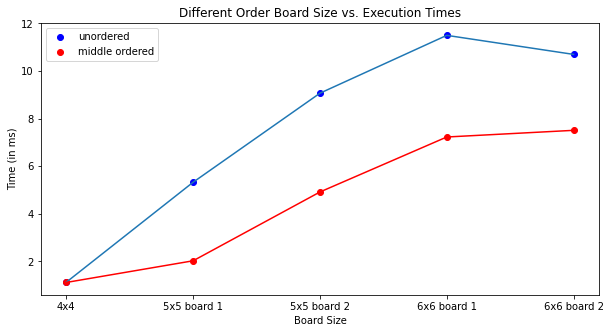

In [682]:
#PLOT DISPLAYING UNORDERED VS ORDERED
import matplotlib.pyplot as plot

#setting up graph dimensions
mygraph = plot.figure(figsize = (10, 5))

#plotting UNORDERED line
plotvalues1 = [('4x4', 1.13), ('5x5 board 1', 5.33), ('5x5 board 2', 9.07), ('6x6 board 1', 11.5), ('6x6 board 2', 10.7)]
x1 = [value[0] for value in plotvalues1]
y1 = [value[1] for value in plotvalues1]
plot.plot(x1, y1)
plot.scatter('4x4', 1.13, facecolor='blue')
plot.scatter('5x5 board 1', 5.33, facecolor='blue', label ='unordered')
plot.scatter('5x5 board 2', 9.07, facecolor='blue')
plot.scatter('6x6 board 1', 11.5, facecolor='blue')
plot.scatter('6x6 board 2', 10.7, facecolor='blue')

#plotting ORDERED line
plotvalues2 = [('4x4', 1.12), ('5x5 board 1', 2.03), ('5x5 board 2', 4.92), ('6x6 board 1', 7.23), ('6x6 board 2', 7.51)]
x2 = [value[0] for value in plotvalues2]
y2 = [value[1] for value in plotvalues2]
plot.plot(x2, y2, color='red')
plot.scatter('4x4', 1.12, facecolor='red')
plot.scatter('5x5 board 1', 2.03, facecolor='red', label ='middle ordered')
plot.scatter('5x5 board 2', 4.92, facecolor='red')
plot.scatter('6x6 board 1', 7.23, facecolor='red')
plot.scatter('6x6 board 2', 7.51, facecolor='red')

plot.title('Different Order Board Size vs. Execution Times')
plot.ylabel('Time (in ms)')
plot.xlabel('Board Size')
plot.legend()
plot.show()

Discussion:
* In order to compare the unordered and the ordered boards, I created a plot that overlaps the unodered plot and the ordered plot to see results more clearly.
* Both the unordered and the middle ordered boards follow the same pattern of increasing the board size, the execution time increases. 
* However, a distinct feature in the graph is that the unordered boards has a higher execution time than the middle ordered boards. This means that the unordered boards has a slower execution time while the middle ordered boards have a higher execution time. 
* This pattern is expected because the middle order board is looking for the good moves first before making a move. Once it finds the best columns to make a move, then an agent plays those columns. Compared an unordered board, this board does not look for the best moves first, so it's not maximizing the agent's potential. Hence, the middle order board tries to be a more efficient algorithm with the ordering.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [687]:
import random as rand

#random agent
def random_agent(player, board):
    
    #returns 1 random move from possible actions
    play = rand.choice(available_actions(board))
    
    #returns the player, the 1 random play & the board 
    return (player, play, board)

#alpha beta search agent
def alpha_beta_search_agent(player, board):
    
    #alpha beta search agent
    v, move = alpha_beta_search(board, player)
    
    #returning: player, v, move, board
    return (player, move, v, board)

In [732]:
def playing(randruns):

    #initializing the amount of wins for each player
    player1wins = 0
    player2wins = 0
    ties = 0
    
    #iterating 1000 times
    for run in range(0, randruns):
        
        #initlalizing an empty board with size 6x7
        board = clear_board((5,5))
        
        #initializing if there is a winner variable
        isThereWinner = False

        #while no one has won the game, do the following:
        while(isThereWinner == False):
            
            #initializing my players
            player1 = random_agent('x', board)
            player2 = alpha_beta_search_agent('o', board)

            #player1 makes first move
            board = action(player1[0],player1[1], board)

            #checking if player1 has won
            if ( utility(player1[0],board) == 'x'):
                player1wins += 1
                isThereWinner = True
                break
            
            #player2 makes next move while no one has won the game
            if(isThereWinner == False):
                board = action(player2[0],player2[1], board)

            #checking if player2 has won
            if ( utility(player2[0],board)== 'o' ):
                player2wins += 1
                isThereWinner = True
                break
            
            #checking if there is a tie
            if ( (utility(player1[0],board)== ' ') or (utility(player2[0],board)== ' ') or (len(available_actions(board))==0) ):
                ties += 1
                isThereWinner = True
                break

    print("# of times played:", randruns)
    print("random agent wins:", player1wins)
    print("alpha beta agent wins:", player2wins)
    print("ties:", ties)
        
playing(1)

# of times played: 1
random agent wins: 0
alpha beta agent wins: 1
ties: 0


This is expected because the alpha beta agent is the agent with the best algorithm (this agent has the most optimized moves), so it's going to win compared for the random agent.

## Task 4: Heuristic Alpha-Beta Tree Search [3 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [768]:
def other(player): 
    if (player == 'x'): 
        return 'o'
    else: 
        return 'x'

def eval_fun(state, player = 'x'):
    """heuristic for utility of state. Returns score and if it is a terminal state.
    1. For terminal states it is the utility. 
    2. For non-terminal states, it calculates a weighted linear function using features of the state. 
    The features we look at are 2 in a row/col/diagonal where the 3rd square is empty. We assume that
    the more of these positions we have, the higher the chance of winning.
    We need to be careful that the utility of the heuristic stays between [-1,1]. 
    Note that the largest possible number of these positions is 4. I weigh the count by 0.1, 
    guaranteeing that is in the needed range.

    Function Returns: heuistic value, terminal?"""

    # terminal state?
    u = utility(player, state)
    if(u == 'x'):
        u = 1
    elif(u == 'o'):
        u = -1
    
    if u is not None: return u, True

    c = state.shape[0]
    r = state.shape[1]
    
    score = 0
    board = np.array(state).reshape((c,r))
    diagonals = np.array([[board[i][i] for i in range(len(board))], 
                          [board[i][len(board)-i-1] for i in range(len(board))]])

    for a_board in [board, np.transpose(board), diagonals]:
        for row in a_board:
            if sum(row == player) == (r-1) and any(row ==' '): score += .1
            if sum(row == other(player)) == (r-1) and any(row ==' '): score -= .1

    return score, False


In [773]:
# TESTING HELPER FUNCTIONS

#empty board
board = clear_board((6,7))

#populating board manually
board = action('x',4, board)
board = action('o',3, board)
board = action('x',4, board)
board = action('o',1, board)
board = action('x',4, board)
board = action('o',1, board)
board = action('x',4, board)

#visualizing board
visualize(board)

#testing eval_fun
print(eval_fun(board, player = 'x'))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'x' ' ' ' ']
 [' ' ' ' ' ' ' ' 'x' ' ' ' ']
 [' ' 'o' ' ' ' ' 'x' ' ' ' ']
 [' ' 'o' ' ' 'o' 'x' ' ' ' ']]
(1, True)


In [833]:
# TESTING HELPER FUNCTIONS

#empty board
board = clear_board((5,5))

#populating board manually
board = action('o',2, board)
board = action('x',3, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)

#visualizing board
visualize(board)

#testing eval_fun
print(eval_fun(board, player = 'o'))

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' 'x' 'o' ' ' ' ']
 [' ' 'x' 'o' 'x' ' ']]
(-1, True)


### Cutting off search 

#### Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [808]:
#code taken & modified from tictactoe_heuristic_alpha_beta_tree_search.ipynb
import math 

# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def heuristic_alpha_beta_search(board, cutoff = None, player = 'x'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0

    value, move = heuristic_max_value_ab(board, player, -math.inf, +math.inf, 0, cutoff)
    
    if DEBUG >= 1: print(f"Number of nodes searched (cutoff = {cutoff}): {COUNT}") 
    
    return value, move

def heuristic_max_value_ab(state, player, alpha, beta, depth, cutoff):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal): 
        if(terminal): alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
        return v, None
    
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in available_actions(state):
        v2, a2 = heuristic_min_value_ab(action(player, a, state), player, alpha, beta, depth + 1, cutoff)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def heuristic_min_value_ab(state, player, alpha, beta, depth, cutoff):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    #if((cutoff is not None and depth >= cutoff) or terminal): 
    # always let the opponent make her move
    if(terminal): 
        if(terminal): alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
        return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in available_actions(state):
        v2, a2 = heuristic_max_value_ab(action('o', a, state), player, alpha, beta, depth + 1, cutoff)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

In [848]:
# experimenting with different 3 cutoff values
# cutoff values: 2,4,6

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' 'x' 'o' ' ' ' ']
 [' ' 'x' 'o' 'x' ' ']]


In [867]:
# CUTOFF VALUE = 2
CUTOFFVAL = 2

#empty board
board = clear_board((5,5))

#populating board
board = action('o',2, board)
board = action('x',3, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)

visualize(board)

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL))

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL, player='o'))

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' 'x' 'o' ' ' ' ']
 [' ' 'x' 'o' 'x' ' ']]

Number of nodes searched (cutoff = 2): 17


(-0.1, 0)

22.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Number of nodes searched (cutoff = 2): 1


(-1, None)

7.11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [869]:
# CUTOFF VALUE = 4
CUTOFFVAL = 4

#empty board
board = clear_board((5,5))

#populating board
board = action('o',2, board)
board = action('x',3, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)

visualize(board)

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL))

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL, player='o'))

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' 'x' 'o' ' ' ' ']
 [' ' 'x' 'o' 'x' ' ']]

Number of nodes searched (cutoff = 4): 22


(inf, 1)

29.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Number of nodes searched (cutoff = 4): 1


(-1, None)

9.82 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [857]:
# CUTOFF VALUE = 6
CUTOFFVAL = 6

#empty board
board = clear_board((5,5))

#populating board
board = action('o',2, board)
board = action('x',3, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)
board = action('x',1, board)
board = action('o',2, board)

visualize(board)

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL))

print()
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board, CUTOFFVAL, player='o'))

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 [' ' 'x' 'o' ' ' ' ']
 [' ' 'x' 'o' 'x' ' ']]

Number of nodes searched (cutoff = 6): 24


(inf, 1)

36.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Number of nodes searched (cutoff = 6): 1


(-1, None)

43.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [872]:
# experimenting with the same boards from task 2 with a cutoff value of 4
CUTOFFVAL = 4
DEBUG = 0

In [873]:
#------- BOARD ONE ---------

#empty board
board = clear_board((6,7))

#populating board manually
board = action('x',0, board)
board = action('o',3, board)
board = action('x',0, board)
board = action('o',1, board)
board = action('x',0, board)
board = action('o',1, board)

#visualizing board
visualize(board)

#alpha beta search test
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board,CUTOFFVAL))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' 'o' ' ' ' ' ' ' ' ' ' ']
 ['x' 'o' ' ' 'o' ' ' ' ' ' ']]


(1, 0)

12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [897]:
#------- BOARD TWO ---------

#empty board
board2 = clear_board((6,7))

#populating board manually
board2 = action('x',1, board2)
board2 = action('o',5, board2)
board2 = action('x',3, board2)
board2 = action('o',3, board2)
board2 = action('x',6, board2)
board2 = action('o',2, board2)
board2 = action('x',6, board2)
board2 = action('o',2, board2)
board2 = action('x',3, board2)
board2 = action('o',5, board2)
board2 = action('x',3, board2)
board2 = action('o',6, board2)
board2 = action('x',2, board2)
board2 = action('o',1, board2)
board2 = action('x',0, board2)
board2 = action('o',0, board2)

#visualizing board
visualize(board2)

#alpha beta search test
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board2,CUTOFFVAL))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' 'x' 'x' ' ' ' ' 'o']
 ['o' 'o' 'o' 'o' ' ' 'o' 'x']
 ['x' 'x' 'o' 'x' ' ' 'o' 'x']]


(inf, 1)

47.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [895]:
#------- BOARD THREE ---------

#empty board
board3 = clear_board((6,7))

#populating board manually
board3 = action('x',0, board3)
board3 = action('o',1, board3)
board3 = action('x',1, board3)
board3 = action('o',2, board3)
board3 = action('o',2, board3)
board3 = action('x',2, board3)
board3[:,3] = 'o'
board3[2][3] = 'x'

#visualizing board
visualize(board3)

#alpha beta search test
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board3,CUTOFFVAL))

[[' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'o' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' 'x' 'o' ' ' ' ' ' ']
 [' ' 'x' 'o' 'o' ' ' ' ' ' ']
 ['x' 'o' 'o' 'o' ' ' ' ' ' ']]


(1, None)

16.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [898]:
#------- BOARD FOUR ---------

#empty board
board4 = clear_board((6,7))

#populating board manually
board4 = action('x',3, board4)
board4 = action('o',6, board4)
board4 = action('x',3, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',3, board4)
board4 = action('x',5, board4)
board4 = action('o',2, board4)
board4 = action('x',3, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',2, board4)
board4 = action('x',4, board4)
board4 = action('o',1, board4)
board4 = action('x',4, board4)
board4 = action('o',6, board4)
board4 = action('x',2, board4)
board4 = action('o',6, board4)
board4 = action('x',4, board4)
board4 = action('o',3, board4)
board4 = action('x',6, board4)
board4 = action('o',1, board4)
board4 = action('x',5, board4)
board4 = action('o',1, board4)

#visualizing board
visualize(board4)

#alpha beta search test
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board4,CUTOFFVAL))

[[' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' ' ' ' ' ' ']
 [' ' ' ' ' ' 'o' ' ' 'x' 'x']
 [' ' 'o' 'x' 'x' 'x' 'o' 'o']
 [' ' 'o' 'o' 'x' 'x' 'x' 'o']
 [' ' 'o' 'o' 'x' 'x' 'o' 'o']]


(1, 0)

34.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [900]:
#------- BOARD FIVE ---------

#empty board
board5 = clear_board((6,7))

#populating board manually
board5 = action('x',1, board5)
board5 = action('o',4, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',5, board5)
board5 = action('o',6, board5)
board5 = action('x',0, board5)
board5 = action('o',2, board5)
board5 = action('x',5, board5)
board5 = action('o',5, board5)
board5 = action('x',4, board5)
board5 = action('o',2, board5)
board5 = action('x',0, board5)
board5 = action('o',2, board5)
board5 = action('x',4, board5)
board5 = action('o',6, board5)
board5 = action('x',5, board5)
board5 = action('o',1, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',6, board5)
board5 = action('o',2, board5)
board5 = action('x',0, board5)
board5 = action('o',0, board5)

#visualizing board
visualize(board5)

#alpha beta search test
%timeit -n1 -r1 display(heuristic_alpha_beta_search(board5,CUTOFFVAL))

[['o' ' ' 'o' ' ' ' ' ' ' ' ']
 ['x' ' ' 'x' ' ' ' ' ' ' ' ']
 ['o' ' ' 'o' ' ' ' ' 'x' ' ']
 ['x' ' ' 'o' ' ' 'x' 'o' 'x']
 ['x' 'o' 'o' ' ' 'x' 'x' 'o']
 ['o' 'x' 'x' ' ' 'o' 'x' 'o']]


(inf, 3)

41.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [883]:
# experimenting with the same boards from task 2 with a cutoff value of 4

In [911]:
%%time
#------- BOARD 4x4 (TEST 1) ---------

#empty board
board = clear_board((4,4))

#populating the board
board = action('x',0, board)
board = action('o',3, board)
board = action('x',0, board)
board = action('o',1, board)
board = action('x',0, board)
board = action('o',1, board)

#timing testing with alpha beta search
DEBUG = 0
move = heuristic_alpha_beta_search(board,CUTOFFVAL)

#visualizing board
visualize(board)

[['x' ' ' ' ' ' ']
 ['x' 'x' ' ' ' ']
 ['x' 'o' ' ' 'x']
 ['x' 'o' 'x' 'o']]
CPU times: user 2.4 ms, sys: 2.15 ms, total: 4.55 ms
Wall time: 3.36 ms


In [926]:
%%time
#------- BOARD 5x5 (TEST 2) ---------

#empty board
board2 = clear_board((5,5))

#populating board manually
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',1, board2)
board2 = action('o',0, board2)

#timing testing with alpha beta search
DEBUG = 0
move = heuristic_alpha_beta_search(board2,CUTOFFVAL,player = 'o')

#visualizing board
visualize(board2)

[[' ' ' ' ' ' ' ' ' ']
 ['o' 'o' ' ' ' ' ' ']
 ['o' 'x' ' ' ' ' ' ']
 ['o' 'x' ' ' ' ' ' ']
 ['o' 'x' 'o' 'o' 'o']]
CPU times: user 2.04 ms, sys: 3.24 ms, total: 5.28 ms
Wall time: 4.17 ms


In [980]:
%%time
#------- BOARD 5x5 (TEST 3) ---------

#empty board
board3 = clear_board((5,5))

#populating board manually
board3 = action('x',1, board3)
board3 = action('o',0, board3)
board3 = action('x',3, board3)
board3 = action('o',2, board3)
board3 = action('x',4, board3)
board3 = action('o',2, board3)
board3 = action('x',0, board3)
board3 = action('o',1, board3)
board3 = action('x',2, board3)
board3 = action('o',0, board3)
board3 = action('x',4, board3)
board3 = action('o',2, board3)

#timing testing with alpha beta search
DEBUG = 0
move = heuristic_alpha_beta_search(board3,CUTOFFVAL,player = 'o')

#visualizing board
visualize(board3)

[['o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'x' 'o' 'o']
 ['x' 'o' 'o' 'o' 'x']
 ['o' 'x' 'o' 'x' 'x']]
CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.1 ms


In [978]:
%%time
#------- BOARD 6x6 (TEST 4) ---------

#empty board
board4 = clear_board((6,6))

#populating board manually
board4 = action('x',1, board4)
board4 = action('o',0, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)
board4 = action('x',5, board4)
board4 = action('o',2, board4)
board4 = action('x',3, board4)
board4 = action('o',1, board4)
board4 = action('x',2, board4)
board4 = action('o',0, board4)
board4 = action('x',4, board4)
board4 = action('o',2, board4)
board4 = action('x',1, board4)
board4 = action('o',5, board4)
board4 = action('x',3, board4)
board4 = action('o',4, board4)

#timing testing with alpha beta search
DEBUG = 0
move = heuristic_alpha_beta_search(board4,CUTOFFVAL,player = 'o')

#visualizing board
visualize(board4)

[[' ' ' ' ' ' ' ' ' ' ' ']
 [' ' 'o' 'o' 'o' 'o' ' ']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'x' 'o' 'x' 'o' 'o']
 ['o' 'o' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 5.16 ms, sys: 2.17 ms, total: 7.33 ms
Wall time: 8.69 ms


In [950]:
%%time
#------- BOARD 6x6 (TEST 5) ---------

#empty board
board5 = clear_board((6,6))

#populating board manually
board5 = action('x',1, board5)
board5 = action('o',0, board5)
board5 = action('x',3, board5)
board5 = action('o',4, board5)
board5 = action('x',5, board5)
board5 = action('o',2, board5)
board5 = action('x',3, board5)
board5 = action('o',3, board5)
board5 = action('x',2, board5)
board5 = action('o',0, board5)
board5 = action('x',4, board5)
board5 = action('o',2, board5)
board5 = action('x',1, board5)
board5 = action('o',5, board5)
board5 = action('x',3, board5)
board5 = action('o',4, board5)

#timing testing with alpha beta search
DEBUG = 0
move = heuristic_alpha_beta_search(board5,CUTOFFVAL,player = 'o')

#visualizing board
visualize(board5)

[[' ' ' ' ' ' 'o' ' ' ' ']
 [' ' ' ' 'o' 'o' 'o' ' ']
 ['o' 'o' 'o' 'x' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'x' 'x' 'x' 'x' 'o']
 ['o' 'x' 'o' 'x' 'o' 'x']]
CPU times: user 7.64 ms, sys: 231 µs, total: 7.87 ms
Wall time: 7.55 ms


##### Graphs
* Graph1- Heuristic: Board Size vs Execution Time Graph
* Graph2- Heuristic vs Nonheuristic: : Board Size vs Execution Time Graph

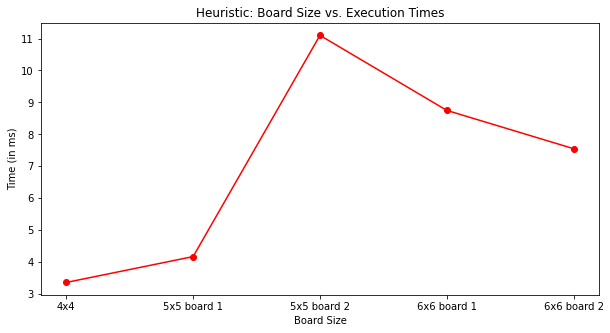

In [985]:
#GRAPH1

import matplotlib.pyplot as plot

#setting up graph dimensions
mygraph = plot.figure(figsize = (10, 5))
plotvalues = [('4x4', 3.36), ('5x5 board 1', 4.17), ('5x5 board 2', 11.1), ('6x6 board 1', 8.75), ('6x6 board 2', 7.55)]
x = [value[0] for value in plotvalues]
y = [value[1] for value in plotvalues]
plot.plot(x, y, color='red')
plot.scatter('4x4', 3.36, facecolor='red')
plot.scatter('5x5 board 1', 4.17, facecolor='red')
plot.scatter('5x5 board 2', 11.1, facecolor='red')
plot.scatter('6x6 board 1', 8.75, facecolor='red')
plot.scatter('6x6 board 2', 7.55, facecolor='red')
plot.title('Heuristic: Board Size vs. Execution Times')
plot.ylabel('Time (in ms)')
plot.xlabel('Board Size')
plot.show()

Discussion:
* In order to see the execution timing difference between different size graphs using the heuristic alpha beta search, I plotted a line graph to compare the data.
* Based on the results above, I can immediately see that '5x5 board 2' stands out. I think this data point is an outler in the graph because all the other data points tend to follow a pattern. The patterm is: as the board increases in size, the execution time increases as well. This is expected because the nodes explored increases with a bigger state space.

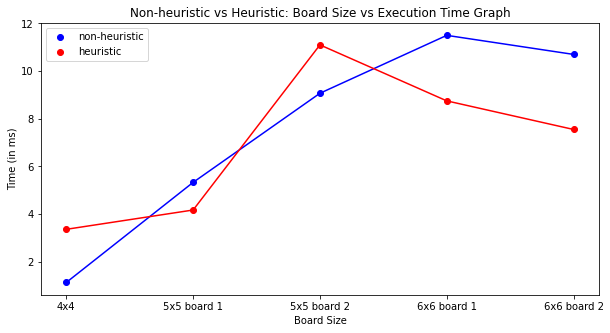

In [988]:
#GRAPH 2

import matplotlib.pyplot as plot

#setting up graph dimensions
mygraph = plot.figure(figsize = (10, 5))

#plotting NONHEUR line
plotvalues1 = [('4x4', 1.13), ('5x5 board 1', 5.33), ('5x5 board 2', 9.07), ('6x6 board 1', 11.5), ('6x6 board 2', 10.7)]
x1 = [value[0] for value in plotvalues1]
y1 = [value[1] for value in plotvalues1]
plot.plot(x1, y1,color='blue')
plot.scatter('4x4', 1.13, facecolor='blue', label ='non-heuristic (unordered)')
plot.scatter('5x5 board 1', 5.33, facecolor='blue')
plot.scatter('5x5 board 2', 9.07, facecolor='blue')
plot.scatter('6x6 board 1', 11.5, facecolor='blue')
plot.scatter('6x6 board 2', 10.7, facecolor='blue')

#plotting HEUR line
plotvalues = [('4x4', 3.36), ('5x5 board 1', 4.17), ('5x5 board 2', 11.1), ('6x6 board 1', 8.75), ('6x6 board 2', 7.55)]
x2 = [value[0] for value in plotvalues]
y2 = [value[1] for value in plotvalues]
plot.plot(x2, y2, color='red')
plot.scatter('4x4', 3.36, facecolor='red', label ='heuristic (unordered)')
plot.scatter('5x5 board 1', 4.17, facecolor='red')
plot.scatter('5x5 board 2', 11.1, facecolor='red')
plot.scatter('6x6 board 1', 8.75, facecolor='red')
plot.scatter('6x6 board 2', 7.55, facecolor='red')

#label
plot.title('Non-heuristic vs Heuristic: Board Size vs Execution Time Graph')
plot.ylabel('Time (in ms)')
plot.xlabel('Board Size')
plot.legend()
plot.show()

Discussion:
* I wanted to compare the board size, timing execution and the type of search to see which algorithm is the best for an agent to play. Hence, I graphed the non-heuristic unordered data from Task 2. This line can be seen in blue. I graphed the heuristic unordered data from Task 3 in red. 
* Based on my previous discussion on Task 2 regarding the non-heuristic unordered data point of the 5x5 board 2, I will be disregarding that data point in my discussion since I believe it is an outlier in my graph.
* As previously discussed, both lines seem to follow the pattern of increasing time as the board size gets bigger.
* However, I do notice that heuristic function for the 4x4 board compared to the non-heuristic function for the 4x4 board costs more time to execute. I think this happens because the heuristic algorithm is best optimized for a bigger search space and in a 4x4 board, this can be considered a small search space. This causes the heuristic algorithm to be as effecient as the non-heuristic algorithm for a 4x4 board  size.
* When looking at bigger board sizes (such as 5x5 and 6x6), I notice that the heuristic algorithm has a lower execution time than the non-heuristic algorithm. This is expected because, as previously stated, the heuristic algorithm is more optimized to use in a bigger search space. Thus, a 5x5 and 6x6 board would fit that big search space requirement.
* Overall, it can be seen that the heuristic algorithm is more optimal and it will be executed faster. This should be used compared to the non-heuristic algorithm when having bigger playing board size.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [184]:
# two heuristic search agents (2 different cutoff depth)

In [1005]:
#alpha beta search agent
def heuristic_agent(player, board, cutoff):
    
    #alpha beta search agent
    v, move = heuristic_alpha_beta_search(board, cutoff, player)
    
    #returning: player, v, move, board
    return (player, move, v, board)

In [1019]:
def playing(randruns):

    #initializing the amount of wins for each player
    cutoff1 = 2
    cutoff2 = 4
    player1wins = 0
    player2wins = 0
    ties = 0
    
    #iterating 1000 times
    for run in range(0, randruns):
        
        #initlalizing an empty board with size 6x7
        board = clear_board((5,5))
        
        #initializing if there is a winner variable
        isThereWinner = False

        #while no one has won the game, do the following:
        while(isThereWinner == False):
            
            #initializing my players
            player1 = heuristic_agent('o', board, cutoff1)
            player2 = heuristic_agent('x', board, cutoff2)

            #player1 makes first move
            board = action(player1[0],player1[1], board)

            #checking if player1 has won
            if ( utility(player1[0],board) == 'x'):
                player1wins += 1
                isThereWinner = True
                break
            
            #player2 makes next move while no one has won the game
            if(isThereWinner == False):
                board = action(player2[0],player2[1], board)

            #checking if player2 has won
            if ( utility(player2[0],board)== 'o' ):
                player2wins += 1
                isThereWinner = True
                break
            
            #checking if there is a tie
            if ( (utility(player1[0],board)== ' ') or (utility(player2[0],board)== ' ') or (len(available_actions(board))==0) ):
                ties += 1
                isThereWinner = True
                break

    print("# of times played:", randruns)
    print("random agent wins:", player1wins)
    print("alpha beta agent wins:", player2wins)
    print("ties:", ties)
        
playing(1)

# of times played: 1
random agent wins: 0
alpha beta agent wins: 0
ties: 1


## Challenge task [+ 1 bonus point]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

* Partner: refer back to the canvas page

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

### Pure Monte Carlos Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [ ]:
#code taken & modified from tictactoe_pure_monte_carlo_search

In [1101]:
DEBUG = 1

def result(player, action, board):
    #making copy of original board
    updatedboard = board
    
    #player making a move- either an x or an o 
    for column in reversed(updatedboard):
        if column[action] == ' ':
            column[action] = player
            return updatedboard
    return board 

def playout(state, act, player = 'x'):
    """Perfrom a random playout starting with the given action on the fiven board 
    and return the utility of the finished game."""
    
    state = result(player, act, state)
    current_player = other(player)
    
    while(True):
        # reached terminal state?
        u = utility(player, board)
        if(u == 'x'):
            u = 1
        elif(u == 'o'):
            u = -1
        if u is not None: return(u)
        
        # we use a random playout policy
        a = np.random.choice(available_actions(state))
        state = result(current_player, a, state)
        
        # switch between players
        current_player = other(current_player)

def playouts(board, action, player = 'x', N = 100):
    """Perform N playouts following the given action for the given board."""
    return [ playout(board, action, player) for i in range(N) ]

def pmcs(board, N = 100, player = 'x'):
    """Pure Monte Carlo Search. Returns the action that has the largest average utility.
    The N playouts are evenly divided between the possible actions."""
    global DEBUG
    
    actions = available_actions(board)
    
    if(len(actions)!=0):
        n = math.floor(N/len(actions))
    
    if(len(actions)==0):
        n = 0
        
    if DEBUG >= 1: print(f"Actions: {actions} ({n} playouts per actions)")
    
    ps = { i:np.mean(playouts(board, i, player, N = n)) for i in actions }
    if DEBUG >= 1: display(ps)
        
    if(max(ps, key=ps.get)!=0):
        action = max(ps, key=ps.get)
    else:
        action = None
    return action

In [1094]:
#------- BOARD 5x5 (TEST 2) ---------

board2 = clear_board((5,5))
board2 = action('x',1, board2)
board2 = action('o',0, board2)
board2 = action('x',3, board2)
board2 = action('o',2, board2)
board2 = action('x',4, board2)
board2 = action('o',2, board2)
board2 = action('x',0, board2)
board2 = action('o',1, board2)
board2 = action('x',2, board2)
board2 = action('o',0, board2)
board2 = action('x',4, board2)
board2 = action('o',2, board2)
visualize(board2)

print()
%timeit -r1 -n1 print(pmcs(board2))

print("10 playouts")
%timeit -r1 -n1 print(pmcs(board2, N = 10))

[[' ' ' ' ' ' ' ' ' ']
 [' ' ' ' 'o' ' ' ' ']
 ['o' ' ' 'x' ' ' ' ']
 ['x' 'o' 'o' ' ' 'x']
 ['o' 'x' 'o' 'x' 'x']]

Actions: [0, 1, 2, 3, 4] (20 playouts per actions)


{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

None
16.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 playouts
Actions: [] (0 playouts per actions)


{}

ValueError: max() arg is an empty sequence

* I couldn't get the Monte Carlo Tree search to work completely, but from my observations and knowledge about the search, MCT search is another heuristic algorithm like the heuristic alpha beta search algorithm. Compared to the alpha beta search, MCT search estimates the utility of a state by trying to simulate a complete game.
* For example, in this game of connect4, there are 2 players playing. Agent 1 is using a MCT search while agent 2 is playing randomly. Hence, at the end of the game, agent 1 is going to win because it is using a heuristic algorithm to optimzie its movements compared to agent 2 who is randomly picking out movements (causing a low chance to win the game since there is no strategy to his movements/plays). 

### Best First Move

How would you determine what the best first move is? You can use Pure Monte Carlo Search or any algorithms 
that you have implemented above.

* To determine what the best first move is, I would use the alpha beta search algorithm because this search looks for the most optimized column on the board to make the first move. Personally, I think the middle column is the most optimzed column for a player (or agent) to make a first move. 
* For example, Player A is dominating the middle column. Player B is trying to fill up spots at the corners. In this case, I think player A can be smart and also try to dominate the middle horizontal row (to almost make a '+' shape on the board). By doing this, it allows player A to control the board easier since they have the upper advantage of having '+' shape lines. For player B, this would mean that it would be very much harder to try to get a connect 4 line since the '+' shape would block out certain spots to get that full connection line.
* Even though I think this theory will work on any board, I think this theory would best optimized for odd number rows. 
* I will test this theory with 2 different board sizes below to see if my theory works. 

In [1133]:
#ALPHA BETA SEARCH CODE FROM TASK 2
#code taken & modified from tictactoe_alpha_beta_tree_search.ipynb

import math

# global variables
DEBUG = 0 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, player = 'x'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return value, move


def max_value_ab(state, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
    
    if DEBUG >= 2: print("max: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in available_actions(state):        
        v2, a2 = min_value_ab(action(player, a, state), player, alpha, beta)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab(state, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(player,state)
    if(v == 'x'):
        v = 1
    elif(v == 'o'):
        v = -1
        
    if DEBUG >= 2: print("min: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in available_actions(state):
        v2, a2 = max_value_ab(action('o', a, state), player, alpha, beta)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

In [1134]:
import random as rand

#random agent
def random_agent(player, board):
    
    #returns 1 random move from possible actions
    play = rand.choice(available_actions(board))
    
    #returns the player, the 1 random play & the board 
    return (player, play, board)

#alpha beta search agent
def alpha_beta_search_agent(player, board):
    
    #alpha beta search agent
    v, move = alpha_beta_search(board, player)
    
    #returning: player, v, move, board
    return (player, move, v, board)

def playing(randruns,size):

    #initializing the amount of wins for each player
    player1wins = 0
    player2wins = 0
    ties = 0
    
    #iterating 1000 times
    for run in range(0, randruns):
        
        #initlalizing an empty board with size 6x7
        board = clear_board((size,size))
        print('Board Size:',size,'x',size)
        
        #initializing if there is a winner variable
        isThereWinner = False

        #while no one has won the game, do the following:
        while(isThereWinner == False):
            
            #initializing my players
            player1 = random_agent('x', board)
            player2 = alpha_beta_search_agent('o', board)

            #player1 makes first move
            board = action(player1[0],player1[1], board)

            #checking if player1 has won
            if ( utility(player1[0],board) == 'x'):
                player1wins += 1
                isThereWinner = True
                break
            
            #player2 makes next move while no one has won the game
            if(isThereWinner == False):
                board = action(player2[0],player2[1], board)

            #checking if player2 has won
            if ( utility(player2[0],board)== 'o' ):
                player2wins += 1
                isThereWinner = True
                break
            
            #checking if there is a tie
            if ( (utility(player1[0],board)== ' ') or (utility(player2[0],board)== ' ') or (len(available_actions(board))==0) ):
                ties += 1
                isThereWinner = True
                break
    
    if(player1wins > player2wins):
        print('Random Agent Won the game!')
    elif(player2wins > player1wins):
        print('Alpha Beta Agent won the game!')
    else:
        print('No winner- there was a tie!')
    
    print('Thanks for playing!')

In [1135]:
playing(1,4)

Board Size: 4 x 4
Alpha Beta Agent won the game!
Thanks for playing!


In [1136]:
playing(1,5)

Board Size: 5 x 5
Alpha Beta Agent won the game!
Thanks for playing!


* After conducting 2 testing trials, I realized that my theory is correct. In both different board sizes, the alpha beta agent was the winner, which proves that the AB agent optimizes its playing moves. 